In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import plotly.express as px
from scipy import stats

In [2]:

df = pd.read_csv('paper_sinkholes/Sinkhole.csv')

df = df[['mes','abra','NIVEL','C/agua','A/C/F']]

df = df.rename(columns={'mes':'month_year','abra':'sinkhole','NIVEL':'level','C/agua':'water','A/C/F':'open_close'})

df['month_year']=pd.to_datetime(df['month_year'], format='%d/%m/%Y')

df = df[df['open_close']!='ND']
df = df.dropna(subset=['open_close','month_year'])

df['year'] = pd.DatetimeIndex(df['month_year']).year

#----------------------------------------------------------------------------------------------
df['open_close'] = pd.to_numeric(df['open_close'], downcast="float")
sum_open_close_month = df.groupby('month_year')['open_close'].sum().to_dict()
lista = []

for key_value in sum_open_close_month.items():
    lista.append((str(key_value[0].year),key_value[1]))

years_data = pd.DataFrame(lista, columns=['year','count'])

mean_open_close_year = years_data.groupby('year')['count'].mean().to_dict()

mean_open_close_year_keys=[]
mean_open_close_year_values=[]
for key, value in mean_open_close_year.items():
    mean_open_close_year_keys.append(key)
    mean_open_close_year_values.append(value)

#---------------------------------------------------------------------------------------------

df['water'].replace({"cerrada":0,"CERRADA":0},inplace=True)

df['water'] = pd.to_numeric(df['water'], downcast="float")
sum_water_month = df.groupby('month_year')['water'].sum().to_dict()

lista = []

for key_value in sum_water_month.items():
    lista.append((str(key_value[0].year),key_value[1]))

years_data = pd.DataFrame(lista, columns=['year','count'])

mean_water_year = years_data.groupby('year')['count'].mean().to_dict()


mean_water_year_keys=[]
mean_water_year_values=[]
for key, value in mean_water_year.items():
    mean_water_year_keys.append(key)
    mean_water_year_values.append(value)

#---------------------------------------------------------------------------------------------
df['level'].replace({"cerrada":0,"CERRADA":0},inplace=True)

df['level'] = pd.to_numeric(df['level'], downcast="float")
sum_level_month = df.groupby('month_year')['level'].sum().to_dict()

lista = []

for key_value in sum_level_month.items():
    lista.append((str(key_value[0].year),key_value[1]))

years_data = pd.DataFrame(lista, columns=['year','count'])

mean_level_year = years_data.groupby('year')['count'].mean().to_dict()
sem_level_year = years_data.groupby('year')['count'].sem().to_dict()

# np.std(datos, ddof=1) / np.sqrt(len(datos))

sem_level_year_keys=[]
sem_level_year_values=[]
for key, value in sem_level_year.items():
    sem_level_year_keys.append(key)
    sem_level_year_values.append(value)


mean_level_year_keys=[]
mean_level_year_values=[]
for key, value in mean_level_year.items():
    mean_level_year_keys.append(key)
    mean_level_year_values.append(value)

/home/uzmar/VirtualEnv/sinkholes/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:

#--------------------------------------------------------------------
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=mean_level_year_keys,
        y=mean_level_year_values,
        name="Level",
        error_y=dict(type='data', array=sem_level_year_values)),
    secondary_y=False,
    )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1., opacity=0.5)

fig.add_trace(
    go.Scatter(
        x=mean_water_year_keys,
        y=mean_water_year_values,
    name="Sinkholes with water"),
    secondary_y=True)

fig.add_trace(
    go.Scatter(
        x=mean_open_close_year_keys,
        y=mean_open_close_year_values,
    name="Opened sinkholes"),
    secondary_y=True)

# Set x-axis title
fig.update_xaxes(title_text="<b>Year<b>")

# Set y-axes titles
fig.update_yaxes(title_text="Average <b>Water Level</b> [<i>cm</i>]", secondary_y=False,range=[0,1000])
fig.update_yaxes(title_text="<b>Sinkhole number<b>", secondary_y=True,range=[0,160])

fig.update_layout(
    width=950,
    height=600,
    margin=dict(l=80, r=40, t=20, b=40),
    paper_bgcolor='rgb(255, 255, 255)',
)

fig.write_image("fig1.png")


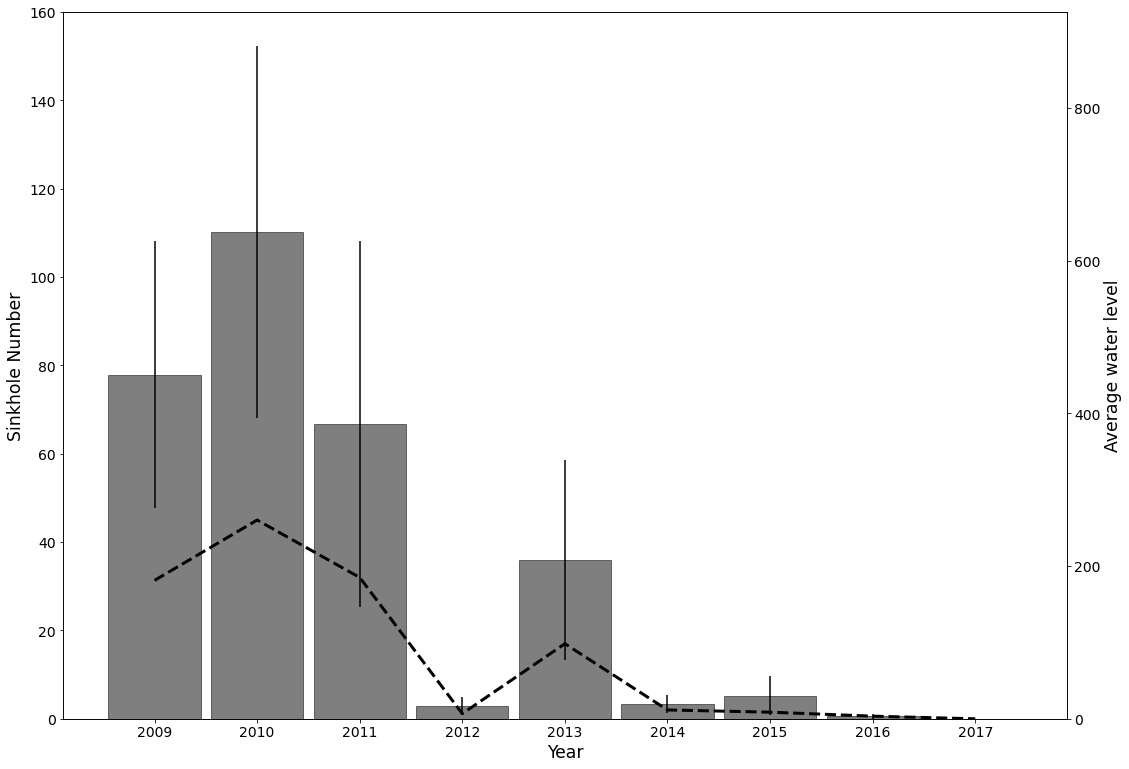

In [4]:
plt.rcParams['figure.figsize'] = [18, 13]

plt.figure()          
plt.plot(
    mean_water_year_keys, 
    mean_water_year_values,
    'k--', 
    linewidth=3,
    label='Sine'
)
plt.ylabel('Sinkhole Number',fontsize='xx-large')
plt.xlabel('Year',fontsize='xx-large')
plt.ylim(0,160)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

axes2 = plt.twinx()
axes2.bar(
    mean_level_year_keys, 
    mean_level_year_values, 
    width=0.9, 
    edgecolor='k',
    color='k', 
    yerr=sem_level_year_values, 
    label='mean water level year',
    alpha = 0.5,
)
axes2.set_ylabel('Average water level (cm)',fontsize='xx-large')
axes2.tick_params(axis='y', labelsize=14)


plt.savefig('waterlevel.png')
plt.show()

In [5]:
dynamic = pd.read_csv('data/dynamic.csv')
size_category = pd.read_csv('data/size_category.csv')
depth = pd.read_csv('data/depth.csv')
richness = pd.read_csv('data/richness.csv')
trend = pd.read_csv('data/trend.csv')
cover = pd.read_csv('data/cover.csv')

In [6]:
cover = cover.T.drop('Categories').reset_index().rename(columns={"index":"Year"})

In [7]:
df = dynamic.set_index("year").T.reset_index().rename(columns={
    "index":"Year",
    "total closed sinkholes": "Total Closed Sinkholes",
    "total new sinkholes": "Total New Sinkholes",
    "open sinkholes (annual average)": "Open Sinkholes (Annual Average)"
})

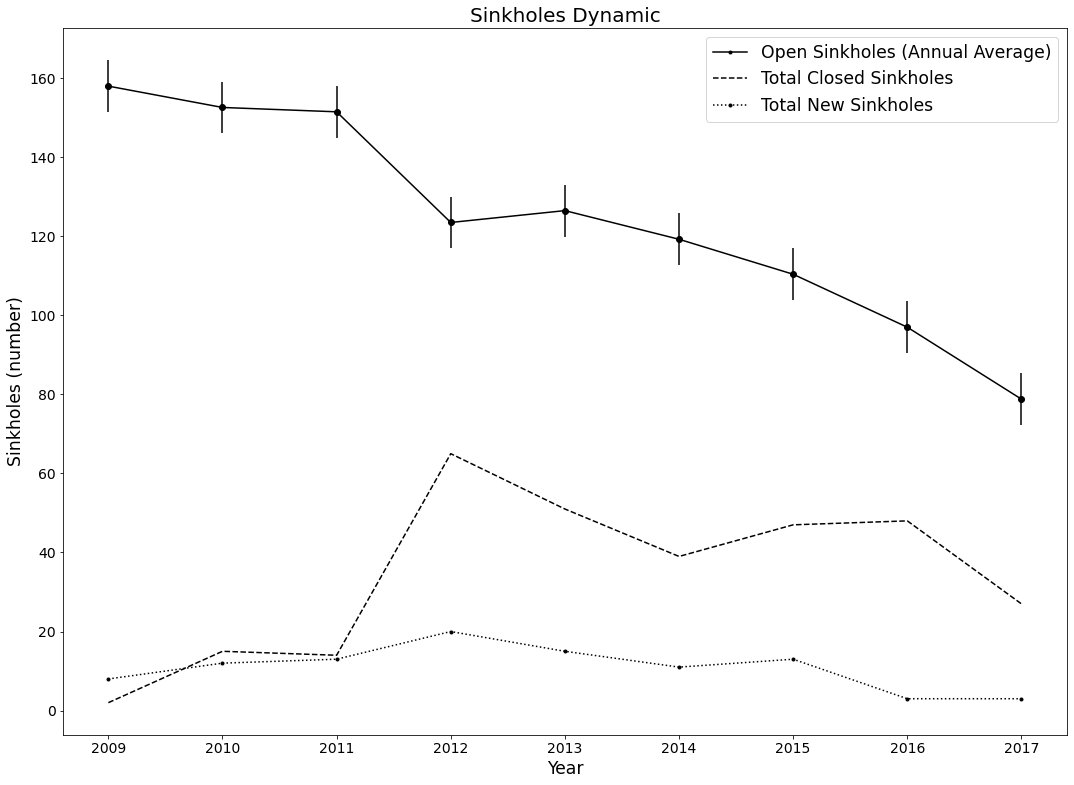

In [8]:
plt.rcParams['figure.figsize'] = [18, 13]


yerr = stats.sem(df.iloc[:, 1], axis=None, ddof=0)

fig, ax = plt.subplots()
ax.plot(df['Year'], df['Open Sinkholes (Annual Average)'], 'k', marker='.', label='Open Sinkholes (Annual Average)')
ax.errorbar(df['Year'], df['Open Sinkholes (Annual Average)'], yerr=yerr, fmt='o', color='k')
ax.plot(df['Year'], df['Total Closed Sinkholes'], 'k--', label='Total Closed Sinkholes')
ax.plot(df['Year'], df['Total New Sinkholes'], 'k:', marker='.', label='Total New Sinkholes')

ax.set_title('Sinkholes Dynamic', fontsize=20)

ax.set_xlabel('Year', fontsize='xx-large')
ax.set_ylabel('Sinkholes (number)', fontsize='xx-large')
legend = ax.legend(shadow=False, fontsize='xx-large')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("dynamic.png")
plt.show()

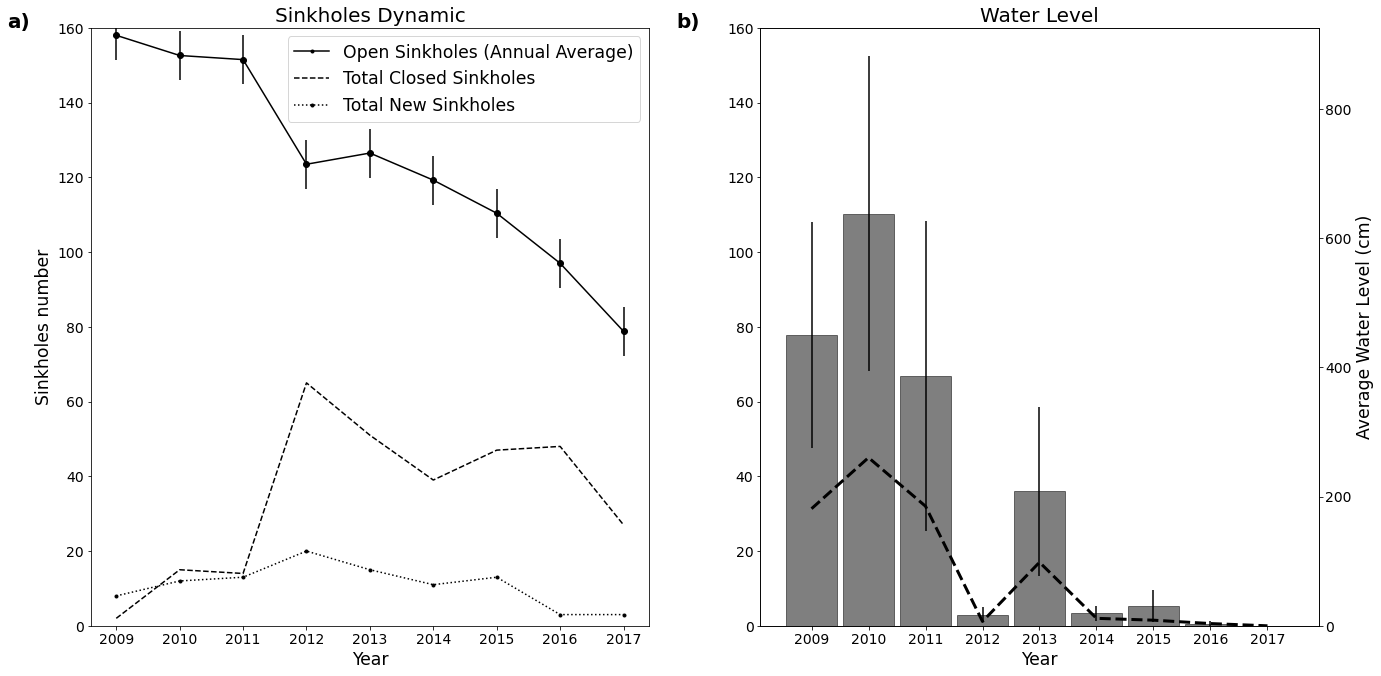

In [12]:
plt.rcParams['figure.figsize'] = [22, 11]

ax1 = plt.subplot2grid((1,2), (0,0))
ax2 = plt.subplot2grid((1,2), (0,1))
     
ax2.plot(
    mean_water_year_keys, 
    mean_water_year_values,
    'k--', 
    linewidth=3,
    label='Sine'
)
ax2.set_xlabel('Year',fontsize='xx-large')
ax2.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.set_ylim(0,160)

ax2.text(-0.15, 1, "b)", fontweight="bold", transform=ax2.transAxes, size=20)
ax2.set_title('Water Level', fontsize=20)

axes2 = ax2.twinx()
axes2.bar(
    mean_level_year_keys, 
    mean_level_year_values, 
    width=0.9, 
    edgecolor='k',
    color='k', 
    yerr=sem_level_year_values, 
    label='Men means',
    alpha = 0.5,
)
axes2.set_ylabel('Average Water Level (cm)',fontsize='xx-large')
axes2.tick_params(axis='y', labelsize=14)

yerr = stats.sem(df.iloc[:, 1], axis=None, ddof=0)

ax1.plot(df['Year'], df['Open Sinkholes (Annual Average)'], 'k', marker='.', label='Open Sinkholes (Annual Average)')
ax1.errorbar(df['Year'], df['Open Sinkholes (Annual Average)'], yerr=yerr, fmt='o', color='k')
ax1.plot(df['Year'], df['Total Closed Sinkholes'], 'k--', label='Total Closed Sinkholes')
ax1.plot(df['Year'], df['Total New Sinkholes'], 'k:', marker='.', label='Total New Sinkholes')

ax1.set_title('Sinkholes Dynamic', fontsize=20)

ax1.text(-0.15, 1, "a)", fontweight="bold", transform=ax1.transAxes, size=20)
ax1.set_xlabel('Year', fontsize='xx-large')
ax1.set_ylabel('Sinkholes number', fontsize='xx-large')
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_ylim(0,160)
legend = ax1.legend(shadow=False, fontsize='xx-large')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("two_plots.png")
plt.show()